# ATOC5860 - sample_data - Lecture #9
### Coded by Libby Barnes (CSU), additional commenting/updating by Jennifer Kay (CU)
### works with python environment atoc5860env2023clean
### Last updated March 5, 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy.signal as sig
import scipy.stats as stats
from matplotlib.gridspec import GridSpec
## needed in ipython notebooks to make plots appear in-line

### Fourier Sums = writing data out as a sum of sines and cosines

$$
y(t) = A_0 + \sum_{K=1} ^{N/2} A_k cos(2\pi k \frac{1}{T}) + \sum_{K=1} ^{N/2} B_k sin(2\pi k \frac{1}{T}) 
$$

- y: resolved on the time interval from $0 \leq t \leq T$. This is YOUR data. 
- N+1: length of the time series, N must be even so that the highest wave number is an integer. Record length needs to be odd so that all harmonic functions fit an integer number of times into the full record
- $A_k \ and B_k$ are the regression coefficients (AMPLITUDES) for each predictor. 
    - Each one is a harmonic function with freq $2\pi k/T$ and fits the interval from $t_1 = 0$ to $t_{N+1} = T$ an integral k number of times.

- if k = 1: function has frequency $2\pi$ radians in the full length of the data and is the LOWEST RESOLVED FREQUENCY
- if k = N/2: function has frequency $2\pi$ radians in TWO time steps. This is the HIGHEST POSSIBLE FREQUENCY THAT CAN BE RESOLVED: <b> NYQUIST FREQUENCY </b>

    - if k = N/2, $B_k$ = 0. 

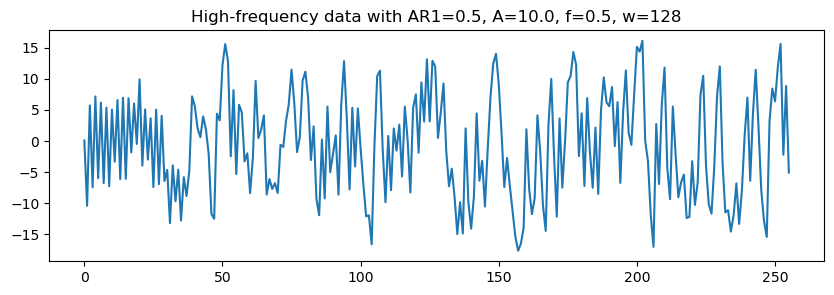

In [2]:
### Construct a synthetic timeseries with power at at a given frequency, specified memory, and specified noise.

#%% input parameters
T = 256                 #length of record (default 256)
alpha = 0.5             #red noise lag-one autocorrelation (default 0.5, try increasing to 0.9 or decreasing to 0.1)
xcosamp = 10.0          #amplitude of oscillation (default 0.5, try increasing to 5 or decreasing to 0.1)
xcosfreq = (128./256.)  #frequency of oscillation (default 50./256., try 10./256. or 100./256.)
noiselevel= 0.01        #noise level (default 0.01)
w=round(xcosfreq*T)            #wave number, # of oscillations that fit in the domain

# Example realization - red noise with oscillation
fig=plt.figure(figsize=(10,3))
factor = np.sqrt(1.-alpha*alpha)
x = np.zeros(T,)
x[0] = x[-1]*alpha + factor*np.random.randn() 
for j in np.arange(1,T,1):
    x[j] = x[j-1]*alpha + factor*np.random.randn()+xcosamp*np.cos(2.*np.pi*(1.-noiselevel*np.random.randn())*xcosfreq*j)
plt.plot(x);
plt.title('High-frequency data with AR1='+str(alpha)+', A='+str(xcosamp)+', f='+str(xcosfreq)+', w='+str(w));

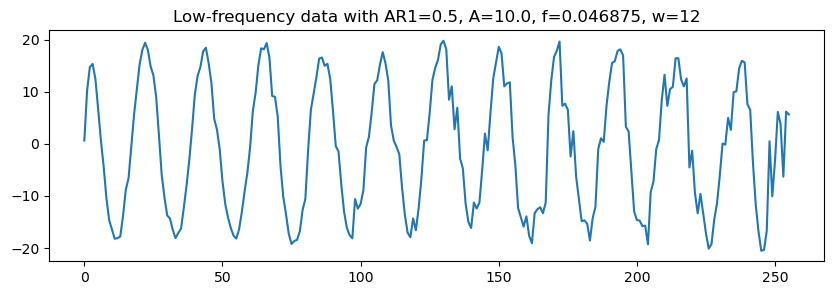

In [4]:
### Construct another synthetic timeseries... vary the frequency, memory, and noise
### e.g. below, lower frequency, but same noise and memory

#%% input parameters
T = 256                 #length of record (default 256)
alpha = 0.5               #red noise lag-one autocorrelation (default 0.5, try increasing to 0.9 or decreasing to 0.1)
xcosamp = 10.0          #amplitude of oscillation (default 0.5, try increasing to 5 or decreasing to 0.1)
xcosfreq = (12./256.)   #frequency of oscillation (default 50./256., try 10./256. or 100./256.)
noiselevel= 0.01       #noise level (default 0.01)
w=round(xcosfreq*T)     #wave number, # of oscillations that fit in the domain

# Example realization - red noise with oscillation
fig=plt.figure(figsize=(10,3))
factor = np.sqrt(1.-alpha*alpha)
x = np.zeros(T,)
x[0] = x[-1]*alpha + factor*np.random.randn() 
for j in np.arange(1,T,1):
    x[j] = x[j-1]*alpha + factor*np.random.randn()+xcosamp*np.cos(2.*np.pi*(1.-noiselevel*np.random.randn())*xcosfreq*j)
plt.plot(x);
plt.title('Low-frequency data with AR1='+str(alpha)+', A='+str(xcosamp)+', f='+str(xcosfreq)+', w='+str(w));